In [1]:
%matplotlib notebook
from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

<IPython.core.display.Javascript object>


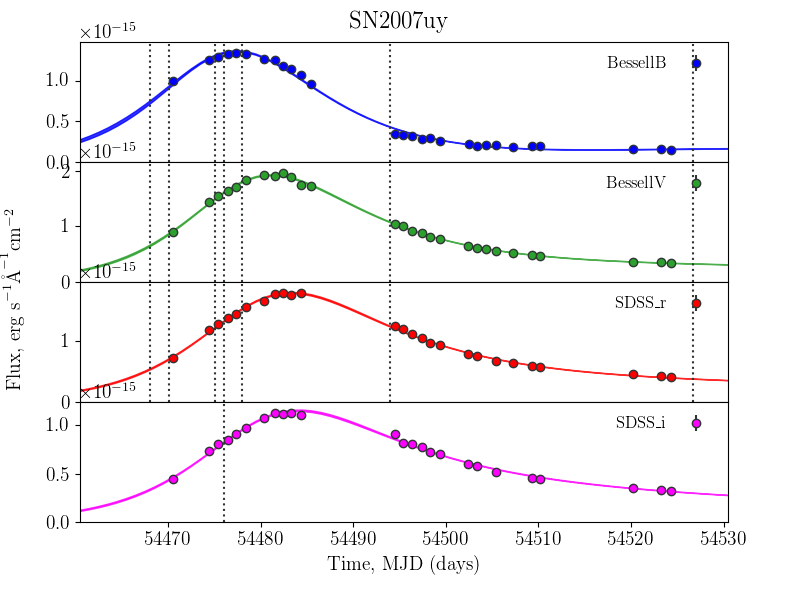

In [2]:
snname = "SN2007uy"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

<IPython.core.display.Javascript object>


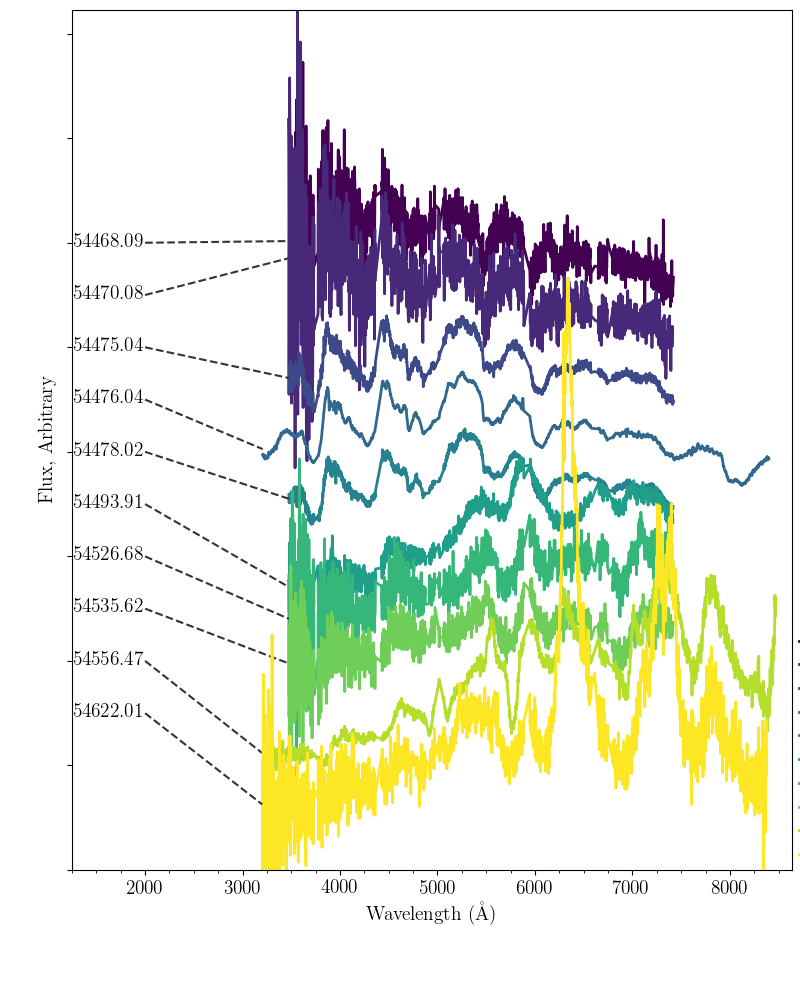

In [3]:
sn.plot_spec()

In [4]:
[sn.spec[i].mjd_obs for i in sn.spec]

[54468.089999999997,
 54470.080000000002,
 54475.040000000001,
 54476.040000000001,
 54478.019999999997,
 54493.910000000003,
 54526.68,
 54535.620000000003,
 54556.470000000001,
 54622.010000000002]

<IPython.core.display.Javascript object>


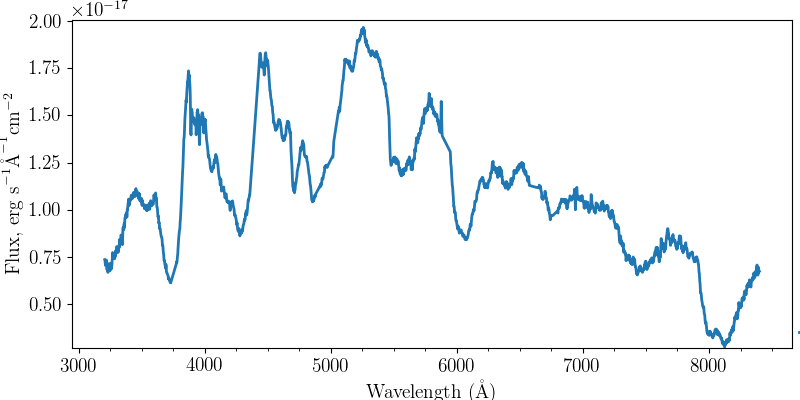

In [21]:
sn.spec["2007uy_-5.06.txt"].plot()

In [6]:
spec = sn.spec["2007uy_-5.06.txt"]

In [7]:
spec.__dict__

{'_default_data_dir_path': '/Users/berto/Code/CoCo/data/spec/',
 '_default_list_dir_path': '/Users/berto/Code/CoCo/lists/',
 '_overlapping_filter_list': array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
       dtype='<U8'),
 'data': <Table length=2664>
 wavelength          flux         
  Angstrom  erg / (Angstrom cm2 s)
  float64          float64        
 ---------- ----------------------
 3205.99597            7.37566e-18
 3207.94955            7.35002e-18
 3209.90313            7.17612e-18
 3211.84664            7.19023e-18
 3213.80022            7.05795e-18
  3215.7538            7.29444e-18
 3217.69731            7.28246e-18
 3219.65089            7.34563e-18
 3221.60447            7.04906e-18
        ...                    ...
 8381.30128            7.08707e-18
 8383.25486            6.69805e-18
 8385.19837            6.56222e-18
 8387.15195            6.55783e-18
 8389.09546            6.56944e-18
 8391.04904            6.76741e-18
 8393.00262            6.96102e-18
 8394.9461

In [8]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x1a0dacb550>),
             ('BessellV', <pycoco.classes.FilterClass at 0x1a0daf03c8>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x1a0da62ba8>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x1a0dc7bef0>)])

In [9]:
filter_name = "BessellB"
for filter_name in sn.phot.data_filters:
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=sn.phot.data_filters[filter_name], spectrum_object=sn.spec["2007uy_-5.06.txt"])
    print(flux)

1.31305196348e-17
1.48347663635e-17
1.18404221408e-17
7.78986305562e-18


In [10]:
from astropy.modeling import blackbody as bb
from astropy.table import Table, Column, Row
from astropy import units as u

In [11]:
bb.blackbody_lambda

<function astropy.modeling.blackbody.blackbody_lambda>

<IPython.core.display.Javascript object>


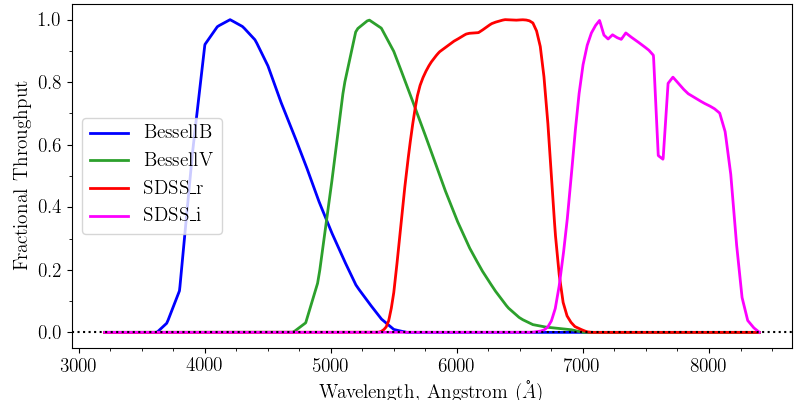

In [13]:
sn.plot_filters()

In [14]:
# fig = plt.figure()

# ax1 = plt.subplot(111)
# ax1.plot(np.arange(len(sn.phot.data_filters["BessellB"].wavelength)), ((sn.phot.data_filters["BessellB"].wavelength - 3205.99597)/1.95358)- np.arange(len(sn.phot.data_filters["BessellB"].wavelength)))

In [15]:
filter_name = "SDSS_i"
new_max_wavelength = 9500
wav_interval = 1.0

orig_wavelength = sn.phot.data_filters[filter_name].wavelength
extend_wavelength = np.append(np.arange(orig_wavelength[-1]+1.0, new_max_wavelength, wav_interval), new_max_wavelength)


In [16]:
sn.phot.data_filters[filter_name].wavelength

3205.99597
3207.94955
3209.90313
3211.84664
3213.80022
3215.7538
3217.69731
3219.65089
3221.60447
3223.54798
3225.50156


In [17]:
bb_flux = bb.blackbody_lambda(np.array(orig_wavelength)*u.AA, temperature=10000*u.Kelvin)

dt_blackbody = Table([orig_wavelength, bb_flux], names=("wavelength", "flux"))

In [18]:
S = pcc.classes.SpectrumClass()

In [19]:
S.load_table(dt_blackbody)

<IPython.core.display.Javascript object>


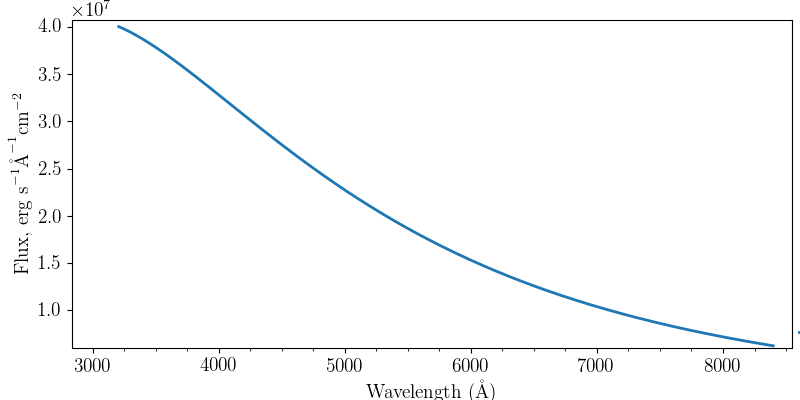

In [20]:
S.plot()

In [ ]:
ap.modeling.blackbody.blackbody_lambda([1000]*u.AA, 1000)

In [ ]:
new_wavelength = orig_wavelength[::-1].insert(0, extend_wavelength[::-1])[::-1]

In [ ]:
new_wavelength

In [ ]:
new_wavelength